In [1]:
import itertools
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from bayesian_privacy_accountant import BayesianPrivacyAccountant
from wasserstein_privacy_accountant import WassersteinPrivacyAccountant

In [2]:
ma_eps = []
ba_eps = []
wa_eps = []

In [3]:
quant = 0.99
sigma = 0.2
plot_range = np.arange(100)

In [4]:
moment_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1, bayesianDP=False)
bayes_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1)
wasser_accountant = WassersteinPrivacyAccountant(order=16, steps_total=plot_range[-1]+1, beta=1)

In [5]:
for i in plot_range:
    grads = np.random.weibull(0.5, [50, 1000])
    C = np.quantile(np.linalg.norm(grads, axis=1), quant)
    #print(np.linalg.norm(grads, axis=1))
    #print(C)
    grads /= np.maximum(1, np.linalg.norm(grads, axis=1, keepdims=True) / C)
    
    moment_accountant.accumulate(
        ldistr=(C*2, sigma * C ), 
        rdistr=(0, sigma * C),
        q=1/1000, 
        steps=1
    )
    ma_eps += [moment_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    pairs = list(zip(*itertools.combinations(torch.tensor(grads), 2)))
    bayes_accountant.accumulate(
        ldistr=(torch.stack(pairs[0]), sigma * C ), 
        rdistr=(torch.stack(pairs[1]), sigma * C ), 
        #ldistr=(torch.tensor(grads[:25]), sigma * C ), 
        #rdistr=(torch.tensor(grads[25:]), sigma * C ), 
        q=1/1000, 
        steps=1
    ) 
    ba_eps += [bayes_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    wasser_accountant.accumulate(
        scale_param = sigma * C ,
        subsampling_rate = 1/1000,
        lgrad = torch.stack(pairs[0]),
        rgrad = torch.stack(pairs[1]), 
    )
    wa_eps += [wasser_accountant.get_privacy(target_delta=1e-5)[0]]

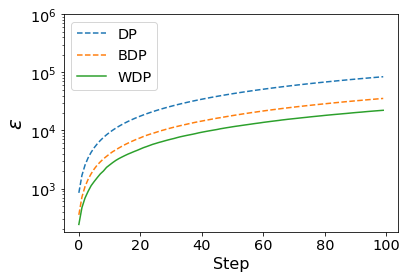

In [6]:
plt.plot(plot_range, ma_eps, '--', label='DP')
plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(plot_range, wa_eps, label='WDP')
plt.xlabel(r'Step', fontsize=16)
plt.ylabel(r'$\varepsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
plt.yscale('log')
plt.ylim(top=1e6)
plt.legend(fontsize=14.5,loc=2)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')

In [7]:
ma_eps = []
ba_eps = []
wa_eps = []

In [8]:
quant = 0.75
sigma = 0.2
plot_range = np.arange(100)

In [9]:
moment_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1, bayesianDP=False)
bayes_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1)
wasser_accountant = WassersteinPrivacyAccountant(order=16, steps_total=plot_range[-1]+1, beta=1)

In [10]:
for i in plot_range:
    grads = np.random.weibull(0.5, [50, 1000])
    C = np.quantile(np.linalg.norm(grads, axis=1), quant)
    #print(np.linalg.norm(grads, axis=1))
    #print(C)
    grads /= np.maximum(1, np.linalg.norm(grads, axis=1, keepdims=True) / C)
    
    moment_accountant.accumulate(
        ldistr=(C*2, sigma * C ), 
        rdistr=(0, sigma * C),
        q=1/1000, 
        steps=1
    )
    ma_eps += [moment_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    pairs = list(zip(*itertools.combinations(torch.tensor(grads), 2)))
    bayes_accountant.accumulate(
        ldistr=(torch.stack(pairs[0]), sigma * C ), 
        rdistr=(torch.stack(pairs[1]), sigma * C ), 
        #ldistr=(torch.tensor(grads[:25]), sigma * C ), 
        #rdistr=(torch.tensor(grads[25:]), sigma * C ), 
        q=1/1000, 
        steps=1
    ) 
    ba_eps += [bayes_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    wasser_accountant.accumulate(
        scale_param = sigma * C ,
        subsampling_rate = 1/1000,
        lgrad = torch.stack(pairs[0]),
        rgrad = torch.stack(pairs[1]), 
    )
    wa_eps += [wasser_accountant.get_privacy(target_delta=1e-5)[0]]

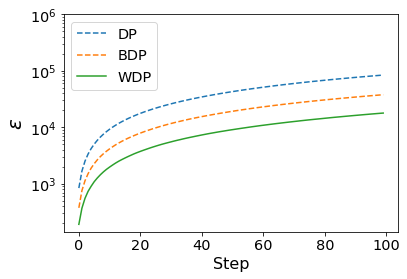

In [11]:
plt.plot(plot_range, ma_eps, '--', label='DP')
plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(plot_range, wa_eps, label='WDP')
plt.xlabel(r'Step', fontsize=16)
plt.ylabel(r'$\varepsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
plt.yscale('log')
plt.ylim(top=1e6)
plt.legend(fontsize=14.5,loc=2)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')

In [12]:
ma_eps = []
ba_eps = []
wa_eps = []

In [13]:
quant = 0.50
sigma = 0.2
plot_range = np.arange(100)

In [14]:
moment_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1, bayesianDP=False)
bayes_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1)
wasser_accountant = WassersteinPrivacyAccountant(order=16, steps_total=plot_range[-1]+1, beta=1)

In [15]:
for i in plot_range:
    grads = np.random.weibull(0.5, [50, 1000])
    C = np.quantile(np.linalg.norm(grads, axis=1), quant)
    #print(np.linalg.norm(grads, axis=1))
    #print(C)
    grads /= np.maximum(1, np.linalg.norm(grads, axis=1, keepdims=True) / C)
    
    moment_accountant.accumulate(
        ldistr=(C*2, sigma * C ), 
        rdistr=(0, sigma * C),
        q=1/1000, 
        steps=1
    )
    ma_eps += [moment_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    pairs = list(zip(*itertools.combinations(torch.tensor(grads), 2)))
    bayes_accountant.accumulate(
        ldistr=(torch.stack(pairs[0]), sigma * C ), 
        rdistr=(torch.stack(pairs[1]), sigma * C ), 
        #ldistr=(torch.tensor(grads[:25]), sigma * C ), 
        #rdistr=(torch.tensor(grads[25:]), sigma * C ), 
        q=1/1000, 
        steps=1
    ) 
    ba_eps += [bayes_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    wasser_accountant.accumulate(
        scale_param = sigma * C ,
        subsampling_rate = 1/1000,
        lgrad = torch.stack(pairs[0]),
        rgrad = torch.stack(pairs[1]), 
    )
    wa_eps += [wasser_accountant.get_privacy(target_delta=1e-5)[0]]

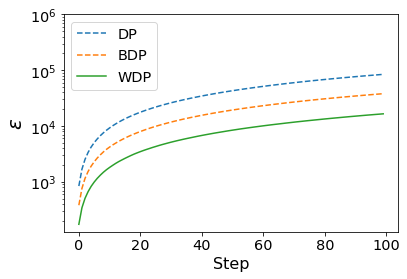

In [16]:
plt.plot(plot_range, ma_eps, '--', label='DP')
plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(plot_range, wa_eps, label='WDP')
plt.xlabel(r'Step', fontsize=16)
plt.ylabel(r'$\varepsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
plt.yscale('log')
plt.ylim(top=1e6)
plt.legend(fontsize=14.5,loc=2)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')

In [17]:
ma_eps = []
ba_eps = []
wa_eps = []

In [18]:
quant = 0.05
sigma = 0.2
plot_range = np.arange(100)

In [19]:
moment_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1, bayesianDP=False)
bayes_accountant = BayesianPrivacyAccountant(powers=16, total_steps=plot_range[-1]+1)
wasser_accountant = WassersteinPrivacyAccountant(order=16, steps_total=plot_range[-1]+1, beta=1)

In [20]:
for i in plot_range:
    grads = np.random.weibull(0.5, [50, 1000])
    C = np.quantile(np.linalg.norm(grads, axis=1), quant)
    #print(np.linalg.norm(grads, axis=1))
    #print(C)
    grads /= np.maximum(1, np.linalg.norm(grads, axis=1, keepdims=True) / C)
    
    moment_accountant.accumulate(
        ldistr=(C*2, sigma * C ), 
        rdistr=(0, sigma * C),
        q=1/1000, 
        steps=1
    )
    ma_eps += [moment_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    pairs = list(zip(*itertools.combinations(torch.tensor(grads), 2)))
    bayes_accountant.accumulate(
        ldistr=(torch.stack(pairs[0]), sigma * C ), 
        rdistr=(torch.stack(pairs[1]), sigma * C ), 
        #ldistr=(torch.tensor(grads[:25]), sigma * C ), 
        #rdistr=(torch.tensor(grads[25:]), sigma * C ), 
        q=1/1000, 
        steps=1
    ) 
    ba_eps += [bayes_accountant.get_privacy(target_delta=1e-5)[0]]
    
    
    wasser_accountant.accumulate(
        scale_param = sigma * C ,
        subsampling_rate = 1/1000,
        lgrad = torch.stack(pairs[0]),
        rgrad = torch.stack(pairs[1]), 
    )
    wa_eps += [wasser_accountant.get_privacy(target_delta=1e-5)[0]]

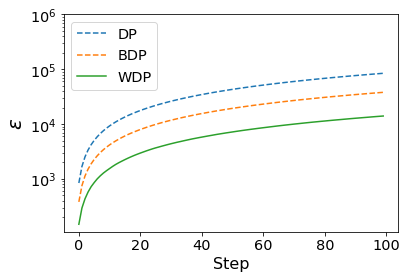

In [21]:
plt.plot(plot_range, ma_eps, '--', label='DP')
plt.plot(plot_range, ba_eps, '--', label='BDP')
plt.plot(plot_range, wa_eps, label='WDP')
plt.xlabel(r'Step', fontsize=16)
plt.ylabel(r'$\varepsilon$', fontsize=20)
plt.xticks(fontsize=14.5)
plt.yticks(fontsize=14.5)
plt.yscale('log')
plt.ylim(top=1e6)
plt.legend(fontsize=14.5,loc=2)
#plt.title(r'Privacy loss evolution, $C={:.2f}$-quantile, no clipping'.format(quant), fontsize=12)
plt.savefig('eps_step_{}q_noclip.pdf'.format(int(quant*100)), format='pdf', bbox_inches='tight')